# 캐글 참여 링크

https://www.kaggle.com/t/05f287fe67bb43298d8c3e66a1e71c27

# House Prices 🏠

In [1]:
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

house_df_org = pd.read_csv('train.csv')
test_df_org = pd.read_csv('./test.csv')

house_df = house_df_org.copy()
test_df = test_df_org.copy()
print(f"training dataset : \n {house_df.head(3)}", end="\n")
print(f"test dataset : \n {test_df.head(3)}", end="\n")
print(f"training dataset shape : {house_df.shape}", end="\n")
print(f"test dataset shape : {test_df.shape}", end="\n")

training dataset : 
     Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0  968          20       RL          NaN     7390   Pave   NaN      IR1   
1  739          90       RL         60.0    10800   Pave   NaN      Reg   
2  696          20       RL         54.0    13811   Pave   NaN      IR1   

  LandContour Utilities  ... PoolArea PoolQC Fence MiscFeature MiscVal MoSold  \
0         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      7   
1         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      3   
2         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      7   

  YrSold  SaleType  SaleCondition  SalePrice  
0   2008        WD         Normal     135000  
1   2009        WD         Alloca     179000  
2   2006        WD         Normal     176000  

[3 rows x 81 columns]
test dataset : 
     Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   86          60       RL        121.0    16059 

In [2]:


def check_data_type(df=None):
    # Create a dictionary of column names and their data types
    dic = {col: df[col].dtype for col in df.columns}
    dic = {k: [col for col, v in dic.items() if v == k] for k in set(dic.values())}
    print("\n".join(f"{k}: {len(v)} : {v}" for k, v in dic.items()))

print(f"train data ")
print(check_data_type(house_df))
print(f"test data ")
print(check_data_type(test_df))

isnull_series = house_df.isnull().sum()
print('Training : Null column & count:\n ', isnull_series[isnull_series > 0].sort_values(ascending=False))

isnull_series = test_df.isnull().sum()
print('Test : Null column & count:\n ', isnull_series[isnull_series > 0].sort_values(ascending=False))



train data 
int64: 35 : ['Id', 'MSSubClass', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'YrSold', 'SalePrice']
object: 43 : ['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual'

In [3]:
def impute_missing_values(df=house_df):
    # Impute missing values in categorical columns with 'None'
    categorical_cols = df.select_dtypes(include=['object']).columns
    for col in categorical_cols:
        if col in ['PoolQC', 'MiscFeature', 'Alley', 'Fence']:
            df[col] = df[col].fillna('None')  # More specific "None"
        elif col == 'MasVnrType':
            df[col] = df[col].fillna('None')
        elif col == 'FireplaceQu':
            df[col] = df[col].fillna('NoFireplace')
        elif col in ['GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2']:
            df[col] = df[col].fillna('None')
        elif col == 'Electrical':
            df[col] = df[col].fillna(df['Electrical'].mode()[0])  # Mode for Electrical (only 1 missing)
        else:
            df[col] = df[col].fillna('None')  # Default 'None' for others

    # Impute missing values in numerical columns with the median
    numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns
    #for col in numerical_cols:
    #    df[col] = df[col].fillna(df[col].median())
    ## or groupby median by knn
    from sklearn.impute import KNNImputer
    # Apply KNN Imputation to numerical columns with missing data
    imputer = KNNImputer(n_neighbors=5)  # You can tune n_neighbors
    df[numerical_missing_cols] = imputer.fit_transform(df[numerical_missing_cols])

    return df

impute_missing_values(house_df)
print("taining data : Missing Value Handling Complete : ")
print(house_df.isnull().sum().sum())  # Should print 0
impute_missing_values(test_df)
print("test data : Missing Value Handling Complete : ")
print(test_df.isnull().sum().sum())  # Should print 0



NameError: name 'numerical_missing_cols' is not defined

### Skewed 'saleprice' => normalization  

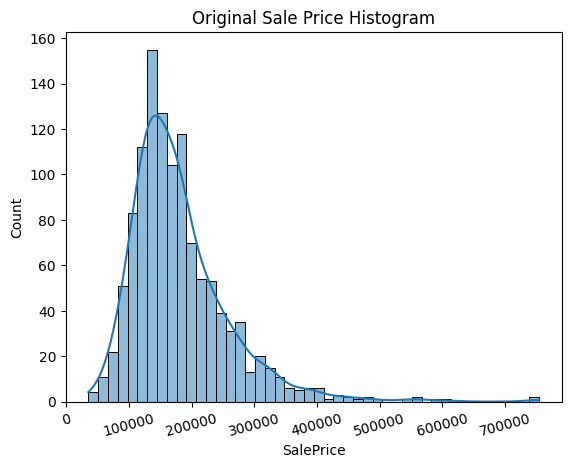

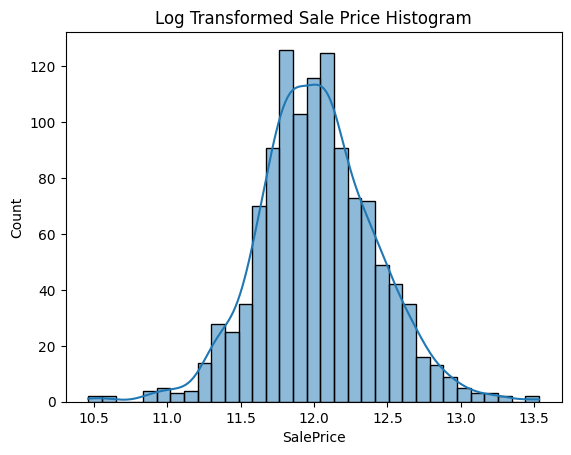

In [ ]:
plt.title('Original Sale Price Histogram')
plt.xticks(rotation=15)
sns.histplot(house_df['SalePrice'], kde=True)
plt.show()

plt.title('Log Transformed Sale Price Histogram')
log_SalePrice = np.log1p(house_df['SalePrice'])
sns.histplot(log_SalePrice, kde=True)
plt.show()

In [ ]:
# SalePrice 로그 변환
original_SalePrice = house_df['SalePrice']
house_df['SalePrice'] = np.log1p(house_df['SalePrice'])




In [ ]:
# for hot encoding, 
# with pd.get_dummies(), should have all dataset columns [ train + test ]
print('Training Shape:', house_df.shape)
print('Test Shape:', test_df.shape)

# separate target variable
y = house_df['SalePrice']
X = house_df #.drop(['SalePrice'], axis=1)
# merge train and test data for one-hot encoding
X_test = test_df.copy()
X_test['SalePrice'] = np.nan
X = pd.concat([X, X_test], axis=0, ignore_index=True)
print('ALL dataset after get_dummies : Shape :', X.shape)
# one-hot encoding
X = pd.get_dummies(X, drop_first=True)
print('ALL dataset with OHE after get_dummies : Shape :', X.shape)
# separate train and test data
X_train = X[X['SalePrice'].notnull()]
X_test = X[X['SalePrice'].isnull()]
X_train = X_train.drop(['SalePrice'], axis=1)
X_test = X_test.drop(['SalePrice'], axis=1)
print('Ater Training with OHE : Shape:', X_train.shape)
print('Ater Test with OHE : Shape:', X_test.shape)
# check the columns are same
X_train_columns = set(X_train.columns)
X_test_columns = set(X_test.columns)
if X_train_columns != X_test_columns:
    print("Columns are not the same between train and test data after OHE.")
else:
    print("Columns are the same between train and test data after OHE.")


Training Shape: (1168, 81)
Test Shape: (292, 80)
ALL dataset after get_dummies : Shape : (1460, 81)
ALL dataset with OHE after get_dummies : Shape : (1460, 261)
Ater Training with OHE : Shape: (1168, 260)
Ater Test with OHE : Shape: (292, 260)
Columns are the same between train and test data after OHE.


In [ ]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

y_target = y #house_df_ohe['SalePrice']
X_features = X_train #house_df_ohe.drop('SalePrice',axis=1, inplace=False)

X_train, X_test, y_train, y_test = train_test_split(X_features, y_target, test_size=0.2, random_state=156) # reuse X_train here 
print(f"X_train shape : {X_train.shape}")
print(f"X_test shape : {X_test.shape}")
print(f"y_train shape : {y_train.shape}")
print(f"y_test shape : {y_test.shape}")
# --- Model Training and Evaluation ---

X_train shape : (934, 260)
X_test shape : (234, 260)
y_train shape : (934,)
y_test shape : (234,)


## split the training dataset and train them with different models 
## dimension reduction
 

In [ ]:

from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import VarianceThreshold
from sklearn.linear_model import Lasso
from sklearn.ensemble import RandomForestRegressor

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

X_train_scaled_df = pd.DataFrame(X_train_scaled, columns=X_train.columns)
X_test_scaled_df = pd.DataFrame(X_test_scaled, columns=X_test.columns)

# --- Feature Selection ---

# 1. Variance Threshold
selector = VarianceThreshold(threshold=0.001)
X_train_variance = selector.fit_transform(X_train_scaled_df)
X_test_variance = selector.transform(X_test_scaled_df)

selected_feature_mask_variance = selector.get_support()
X_train_variance_df = pd.DataFrame(X_train_variance, columns=X_train_scaled_df.columns[selected_feature_mask_variance])
X_test_variance_df = pd.DataFrame(X_test_variance, columns=X_test_scaled_df.columns[selected_feature_mask_variance])


# 2. Lasso (L1 Regularization)
lasso = Lasso(alpha=0.04)  # You'll need to tune alpha / 1st: 0.01
lasso.fit(X_train_variance_df, y_train)

selected_features_lasso = X_train_variance_df.columns[lasso.coef_ != 0].tolist()
X_train_lasso = X_train_variance_df[selected_features_lasso]
X_test_lasso = X_test_variance_df[selected_features_lasso]

# 3. Random Forest Feature Importance (Alternative to Lasso, or you could combine)
model = RandomForestRegressor(n_estimators=50, random_state=42)  # Tune n_estimators / 1st: 100
model.fit(X_train_lasso, y_train)

importances = model.feature_importances_
feature_importances = pd.DataFrame({'Feature': X_train_lasso.columns, 'Importance': importances})
feature_importances = feature_importances.sort_values(by='Importance', ascending=False)

top_k_features = feature_importances['Feature'][:50].tolist()  # Tune k (number of top features)
X_train_selected = X_train_lasso[top_k_features]
X_test_selected = X_test_lasso[top_k_features]


# --- Final Feature Set ---
X_train_preprocessed = X_train_selected
X_test_preprocessed = X_test_selected

In [ ]:
def get_rmse(model):
    pred = model.predict(X_test)
    pred_exp = np.expm1(pred)
    mse = mean_squared_error(np.expm1(y_test) , pred_exp)
    rmse = np.sqrt(mse)
    print('{0} 로그 변환된 RMSE: {1}'.format(model.__class__.__name__,np.round(rmse, 3)))
    print('{0} 로그 변환된 MSE: {1}'.format(model.__class__.__name__,np.round(mse, 3)))

    print('{0} 로그 변환해 RMSE: {1}'.format(model.__class__.__name__,np.round(rmse, 3)))
    print('{0} 로그 변환된 MSE: {1}'.format(model.__class__.__name__,np.round(mse, 3)))

    return rmse

def get_rmses(models):
    rmses = [ ]
    for model in models:
        rmse = get_rmse(model)
        rmses.append(rmse)
    return rmses

## MODELS & ERRORS
model : LinearRegression, Ridge, Lasso
error : RMSE

In [ ]:

# LinearRegression, Ridge, Lasso
lr_reg = LinearRegression()
lr_reg.fit(X_train, y_train)

ridge_reg = Ridge()
ridge_reg.fit(X_train, y_train)

lasso_reg = Lasso()
lasso_reg.fit(X_train, y_train)

models = [lr_reg, ridge_reg, lasso_reg]
get_rmses(models)

LinearRegression 로그 변환된 RMSE: 21972.724
LinearRegression 로그 변환된 MSE: 482800613.392
LinearRegression 로그 변환해 RMSE: 21972.724
LinearRegression 로그 변환된 MSE: 482800613.392
Ridge 로그 변환된 RMSE: 22992.996
Ridge 로그 변환된 MSE: 528677887.23
Ridge 로그 변환해 RMSE: 22992.996
Ridge 로그 변환된 MSE: 528677887.23
Lasso 로그 변환된 RMSE: 33951.659
Lasso 로그 변환된 MSE: 1152715124.917
Lasso 로그 변환해 RMSE: 33951.659
Lasso 로그 변환된 MSE: 1152715124.917


[np.float64(21972.72430520335),
 np.float64(22992.996482186532),
 np.float64(33951.658647514254)]

In [ ]:
def get_top_bottom_coef(model):
    # coef_ 속성을 기반으로 Series 객체를 생성. index는 컬럼명.
    coef = pd.Series(model.coef_, index=X_features.columns)

    # + 상위 10개 , - 하위 10개 coefficient 추출하여 반환.
    coef_high = coef.sort_values(ascending=False).head(10)
    coef_low = coef.sort_values(ascending=False).tail(10)
    return coef_high, coef_low

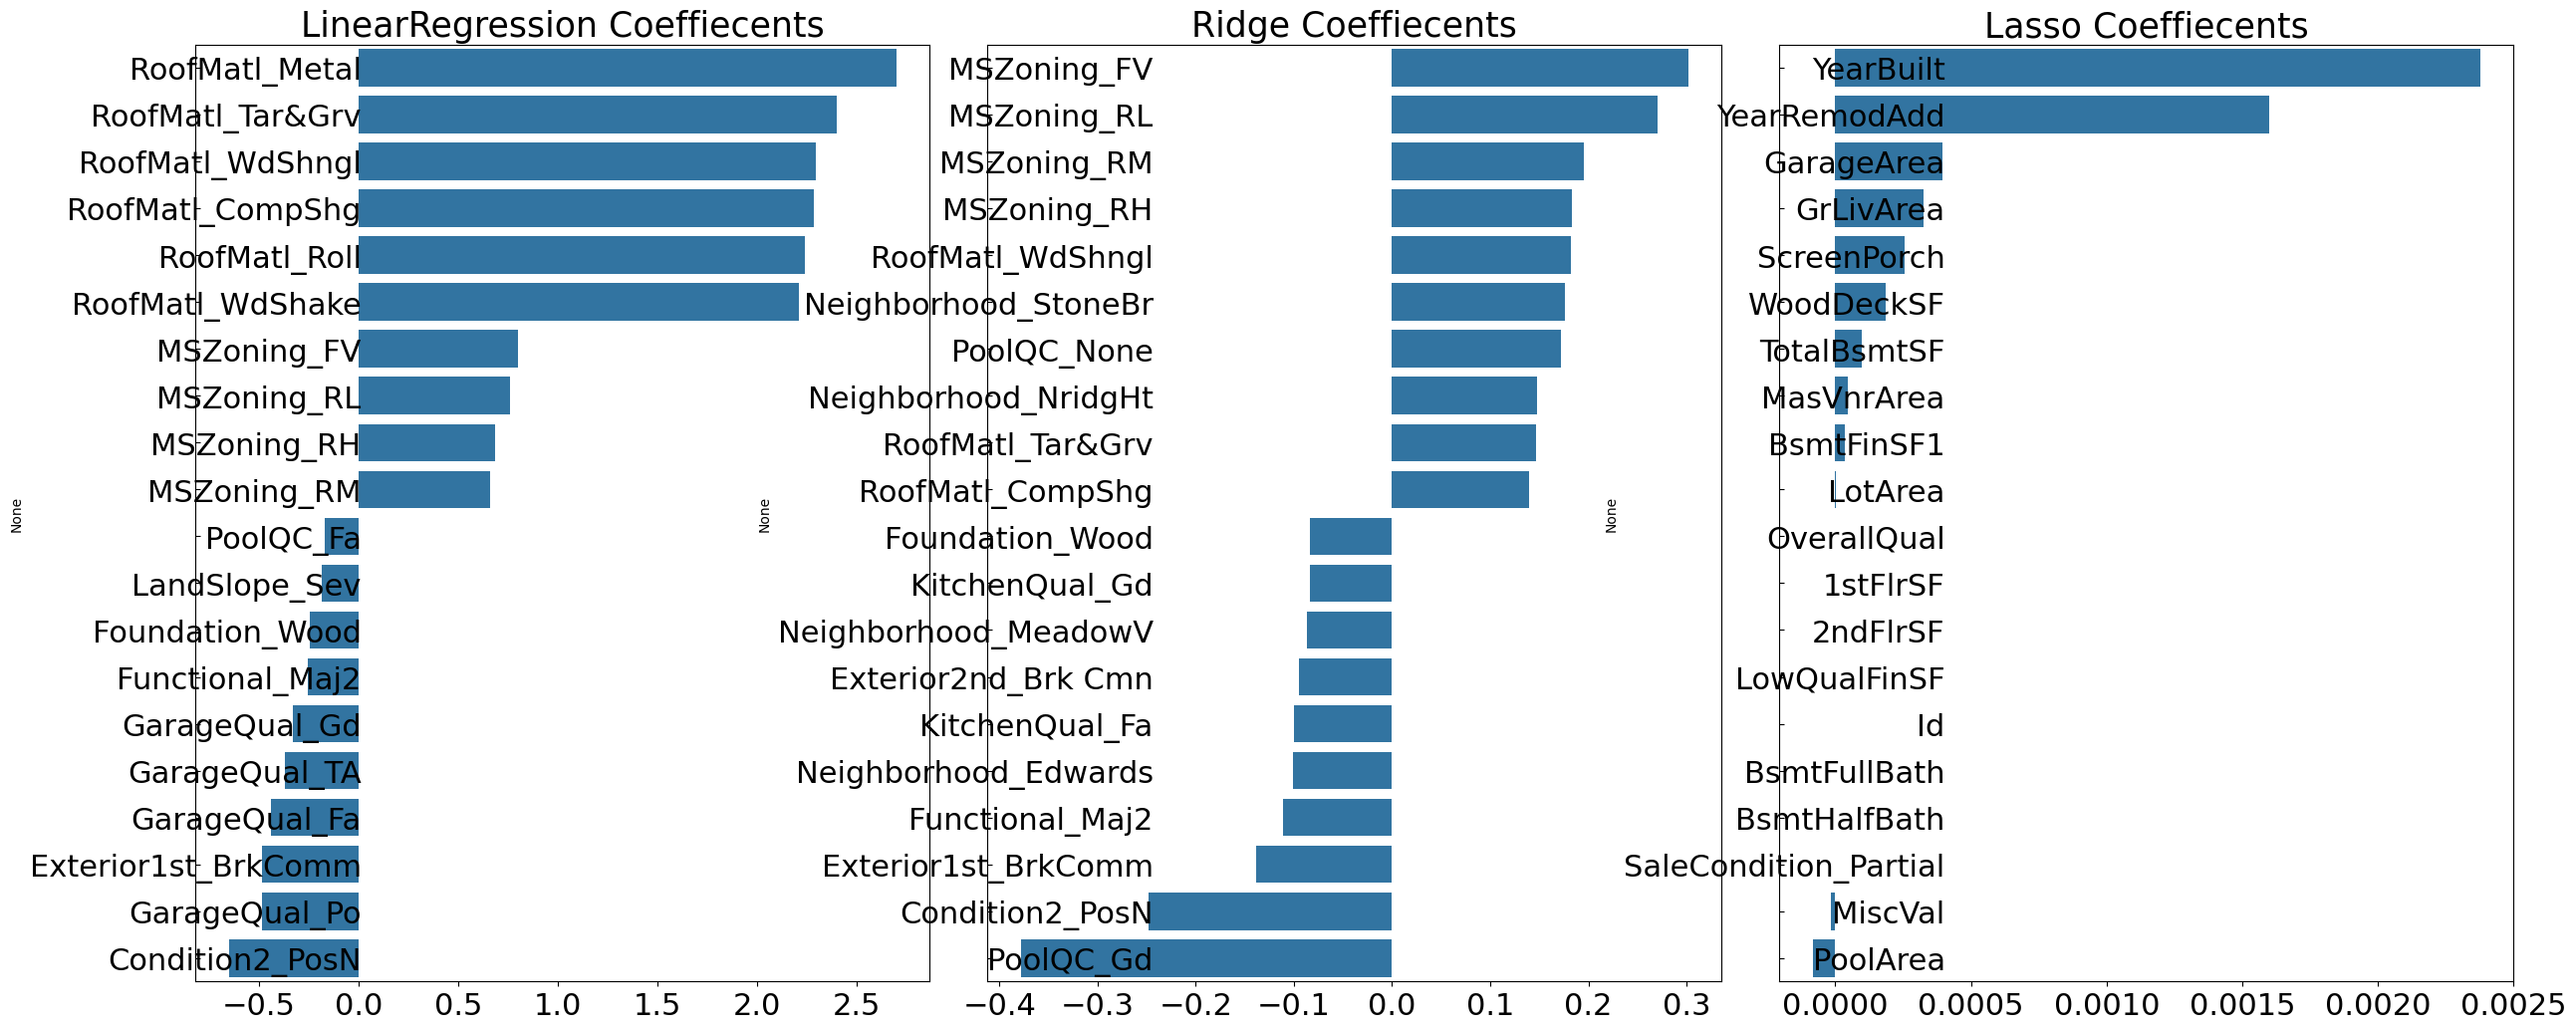

In [ ]:
def visualize_coefficient(models):
    # 3개 회귀 모델의 시각화를 위해 3개의 컬럼을 가지는 subplot 생성
    fig, axs = plt.subplots(figsize=(24,10),nrows=1, ncols=3)
    fig.tight_layout()
    # 입력인자로 받은 list객체인 models에서 차례로 model을 추출하여 회귀 계수 시각화.
    for i_num, model in enumerate(models):
        # 상위 10개, 하위 10개 회귀 계수를 구하고, 이를 판다스 concat으로 결합.
        coef_high, coef_low = get_top_bottom_coef(model)
        coef_concat = pd.concat( [coef_high , coef_low] )
        # 순차적으로 ax subplot에 barchar로 표현. 한 화면에 표현하기 위해 tick label 위치와 font 크기 조정.
        axs[i_num].set_title(model.__class__.__name__+' Coeffiecents', size=25)
        axs[i_num].tick_params(axis="y",direction="in", pad=-120)
        for label in (axs[i_num].get_xticklabels() + axs[i_num].get_yticklabels()):
            label.set_fontsize(22)
        sns.barplot(x=coef_concat.values, y=coef_concat.index , ax=axs[i_num])

# 앞 예제에서 학습한 lr_reg, ridge_reg, lasso_reg 모델의 회귀 계수 시각화.
models = [lr_reg, ridge_reg, lasso_reg]
visualize_coefficient(models)

In [ ]:
from sklearn.model_selection import cross_val_score

def get_avg_rmse_cv(models):
    for model in models:
        # 분할하지 않고 전체 데이터로 cross_val_score( ) 수행. 모델별 CV RMSE값과 평균 RMSE 출력
        rmse_list = np.sqrt(-cross_val_score(model, X_features, y_target,
                                             scoring="neg_mean_squared_error", cv = 5))
        rmse_avg = np.mean(rmse_list)
        print('\n{0} CV RMSE 값 리스트: {1}'.format( model.__class__.__name__, np.round(rmse_list, 3)))
        print('{0} CV 평균 RMSE 값: {1}'.format( model.__class__.__name__, np.round(rmse_avg, 3)))

# 앞 예제에서 학습한 lr_reg, ridge_reg, lasso_reg 모델의 CV RMSE값 출력
models = [lr_reg, ridge_reg, lasso_reg]
get_avg_rmse_cv(models)


LinearRegression CV RMSE 값 리스트: [0.245 0.307 0.146 0.133 0.126]
LinearRegression CV 평균 RMSE 값: 0.191

Ridge CV RMSE 값 리스트: [0.216 0.174 0.125 0.135 0.123]
Ridge CV 평균 RMSE 값: 0.155

Lasso CV RMSE 값 리스트: [0.287 0.212 0.173 0.185 0.17 ]
Lasso CV 평균 RMSE 값: 0.205


In [ ]:
from sklearn.model_selection import GridSearchCV

def print_best_params(model, params):
    grid_model = GridSearchCV(model, param_grid=params,
                              scoring='neg_mean_squared_error', cv=5)
    grid_model.fit(X_features, y_target)
    rmse = np.sqrt(-1* grid_model.best_score_)
    print('{0} 5 CV 시 최적 평균 RMSE 값: {1}, 최적 alpha:{2}'.format(model.__class__.__name__,
                                        np.round(rmse, 4), grid_model.best_params_))
    return grid_model.best_estimator_

ridge_params = { 'alpha':[0.05, 0.1, 1, 5, 8, 10, 12, 15, 20] }
lasso_params = { 'alpha':[0.001, 0.005, 0.008, 0.05, 0.03, 0.1, 0.5, 1,5, 10] }
best_rige = print_best_params(ridge_reg, ridge_params)
best_lasso = print_best_params(lasso_reg, lasso_params)

Ridge 5 CV 시 최적 평균 RMSE 값: 0.1529, 최적 alpha:{'alpha': 15}
Lasso 5 CV 시 최적 평균 RMSE 값: 0.157, 최적 alpha:{'alpha': 0.001}


LinearRegression 로그 변환된 RMSE: 21972.724
LinearRegression 로그 변환된 MSE: 482800613.392
LinearRegression 로그 변환해 RMSE: 21972.724
LinearRegression 로그 변환된 MSE: 482800613.392
Ridge 로그 변환된 RMSE: 23812.181
Ridge 로그 변환된 MSE: 567019962.125
Ridge 로그 변환해 RMSE: 23812.181
Ridge 로그 변환된 MSE: 567019962.125
Lasso 로그 변환된 RMSE: 25000.609
Lasso 로그 변환된 MSE: 625030469.211
Lasso 로그 변환해 RMSE: 25000.609
Lasso 로그 변환된 MSE: 625030469.211


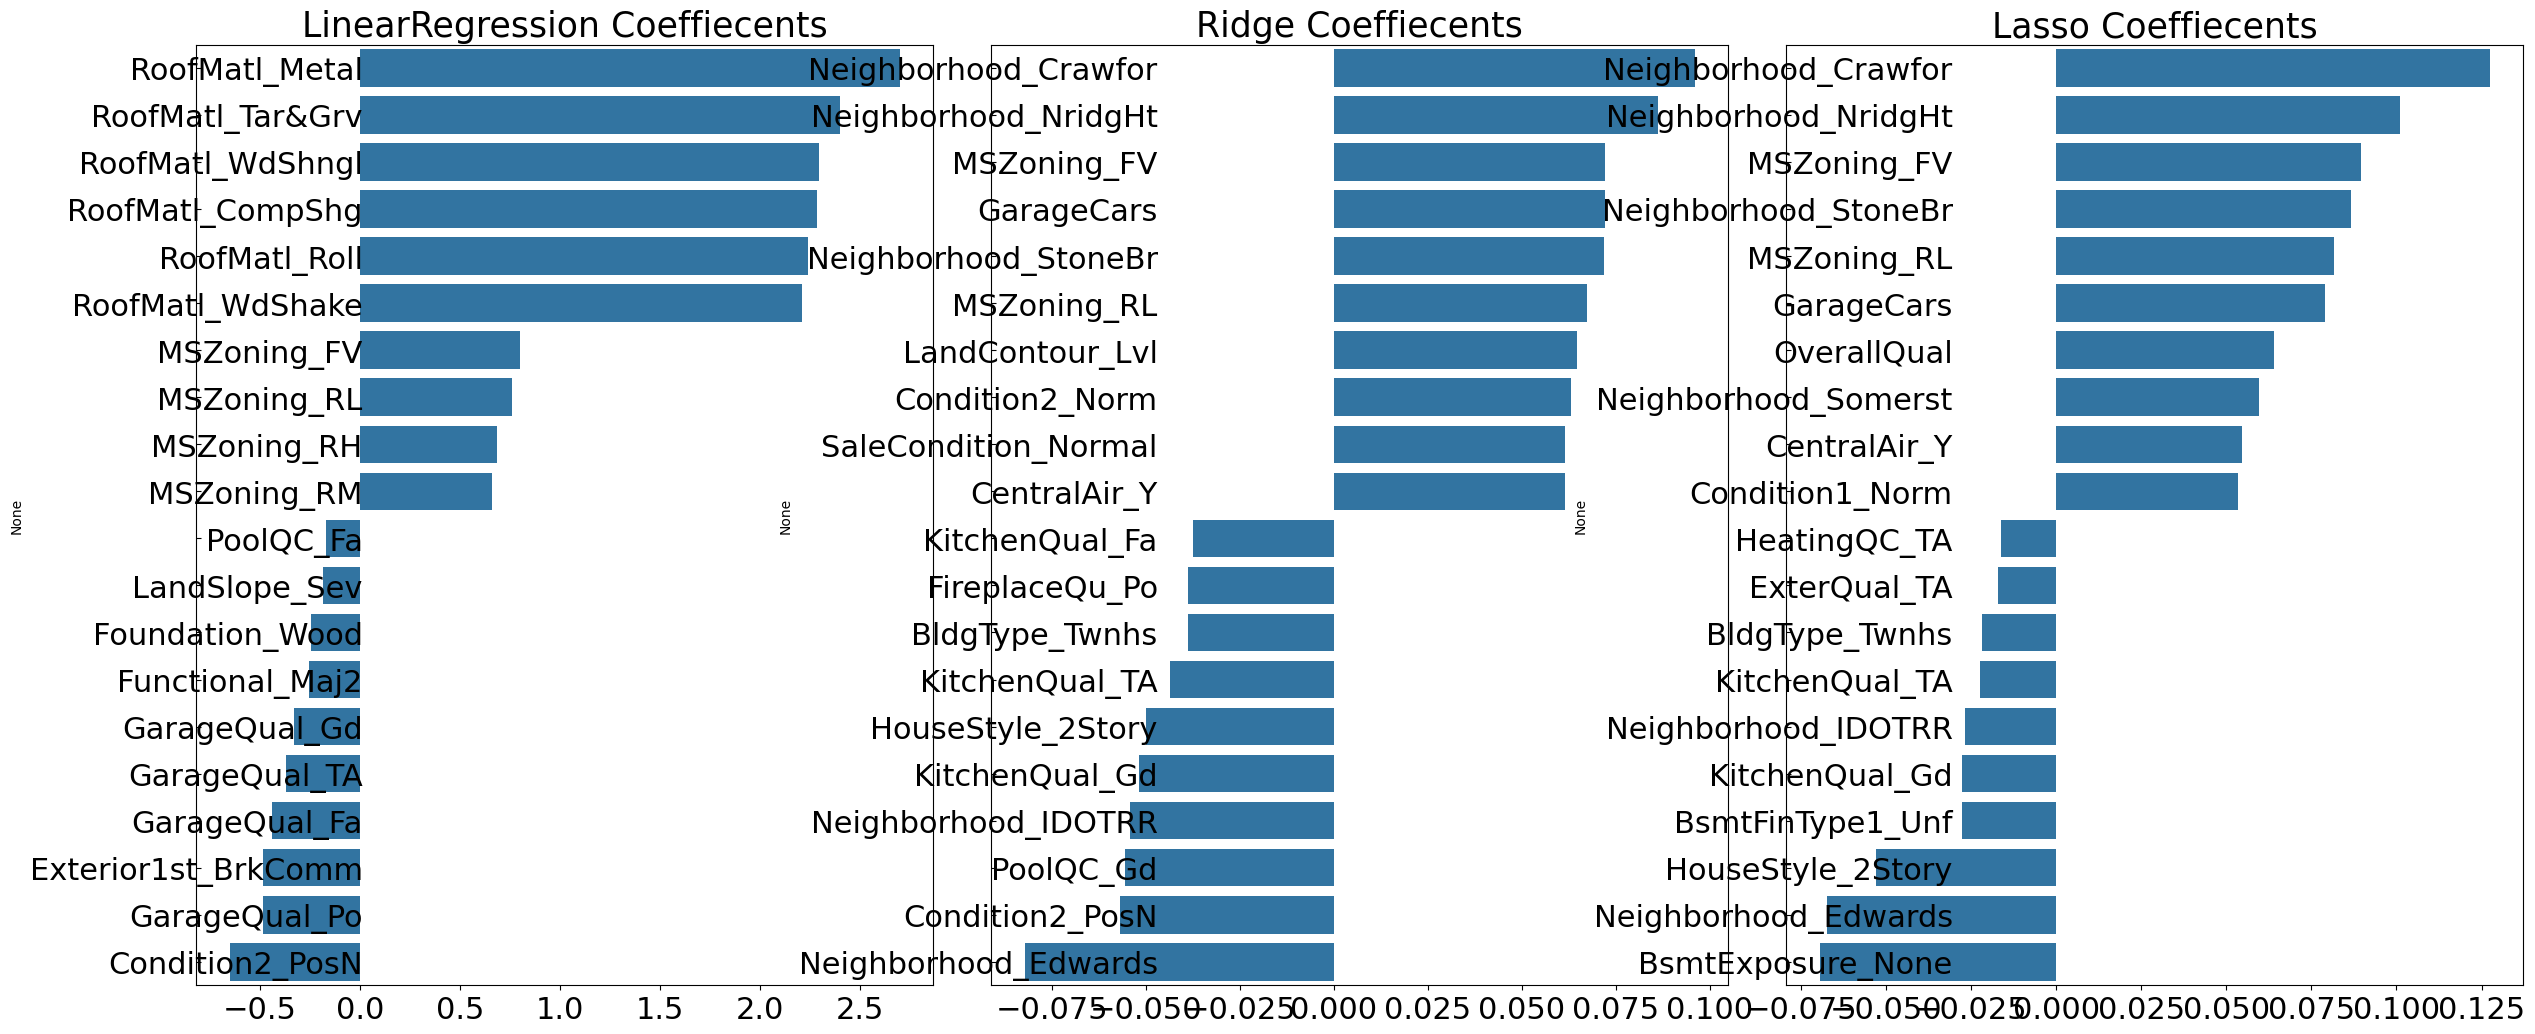

In [ ]:
# 앞의 최적화 alpha값으로 학습데이터로 학습, 테스트 데이터로 예측 및 평가 수행.
lr_reg = LinearRegression()
lr_reg.fit(X_train, y_train)
ridge_reg = Ridge(alpha=12)
ridge_reg.fit(X_train, y_train)
lasso_reg = Lasso(alpha=0.001)
lasso_reg.fit(X_train, y_train)

# 모든 모델의 RMSE 출력
models = [lr_reg, ridge_reg, lasso_reg]
get_rmses(models)

# 모든 모델의 회귀 계수 시각화
models = [lr_reg, ridge_reg, lasso_reg]
visualize_coefficient(models)

In [ ]:
from scipy.stats import skew

# object가 아닌 숫자형 피처의 칼럼 index 객체 추출.
features_index = house_df.dtypes[house_df.dtypes != 'object'].index
# house_df에 칼럼 index를 [ ]로 입력하면 해당하는 칼럼 데이터 세트 반환. apply lambda로 skew( ) 호출
skew_features = house_df[features_index].apply(lambda x : skew(x))
# skew(왜곡) 정도가 1 이상인 칼럼만 추출.
skew_features_top = skew_features[skew_features > 1]
print(skew_features_top.sort_values(ascending=False))

MiscVal          22.099034
PoolArea         14.377604
LotArea          11.097791
3SsnPorch        11.040646
LowQualFinSF      9.608861
BsmtFinSF2        4.507199
KitchenAbvGr      4.488325
BsmtHalfBath      4.133732
ScreenPorch       3.976766
EnclosedPorch     3.093917
LotFrontage       2.785666
OpenPorchSF       2.454159
MasVnrArea        2.420783
BsmtFinSF1        1.881057
TotalBsmtSF       1.864686
WoodDeckSF        1.546567
1stFlrSF          1.488257
GrLivArea         1.474257
MSSubClass        1.391605
dtype: float64


In [ ]:
house_df[skew_features_top.index] = np.log1p(house_df[skew_features_top.index])

In [ ]:
# Skew가 높은 피처들을 로그 변환 했으므로 다시 원-핫 인코딩 적용 및 피처/타겟 데이터 셋 생성,
house_df_ohe = pd.get_dummies(house_df)
y_target = house_df_ohe['SalePrice']
X_features = house_df_ohe.drop('SalePrice',axis=1, inplace=False)
X_train, X_test, y_train, y_test = train_test_split(X_features, y_target, test_size=0.2, random_state=156)

# 피처들을 로그 변환 후 다시 최적 하이퍼 파라미터와 RMSE 출력
ridge_params = { 'alpha':[0.05, 0.1, 1, 5, 8, 10, 12, 15, 20] }
lasso_params = { 'alpha':[0.001, 0.005, 0.008, 0.05, 0.03, 0.1, 0.5, 1,5, 10] }
best_ridge = print_best_params(ridge_reg, ridge_params)
best_lasso = print_best_params(lasso_reg, lasso_params)

Ridge 5 CV 시 최적 평균 RMSE 값: 0.1338, 최적 alpha:{'alpha': 10}
Lasso 5 CV 시 최적 평균 RMSE 값: 0.1299, 최적 alpha:{'alpha': 0.001}


LinearRegression 로그 변환된 RMSE: 20489.138
LinearRegression 로그 변환된 MSE: 419804795.555
LinearRegression 로그 변환해 RMSE: 20489.138
LinearRegression 로그 변환된 MSE: 419804795.555
Ridge 로그 변환된 RMSE: 21654.471
Ridge 로그 변환된 MSE: 468916128.052
Ridge 로그 변환해 RMSE: 21654.471
Ridge 로그 변환된 MSE: 468916128.052
Lasso 로그 변환된 RMSE: 22238.089
Lasso 로그 변환된 MSE: 494532595.76
Lasso 로그 변환해 RMSE: 22238.089
Lasso 로그 변환된 MSE: 494532595.76


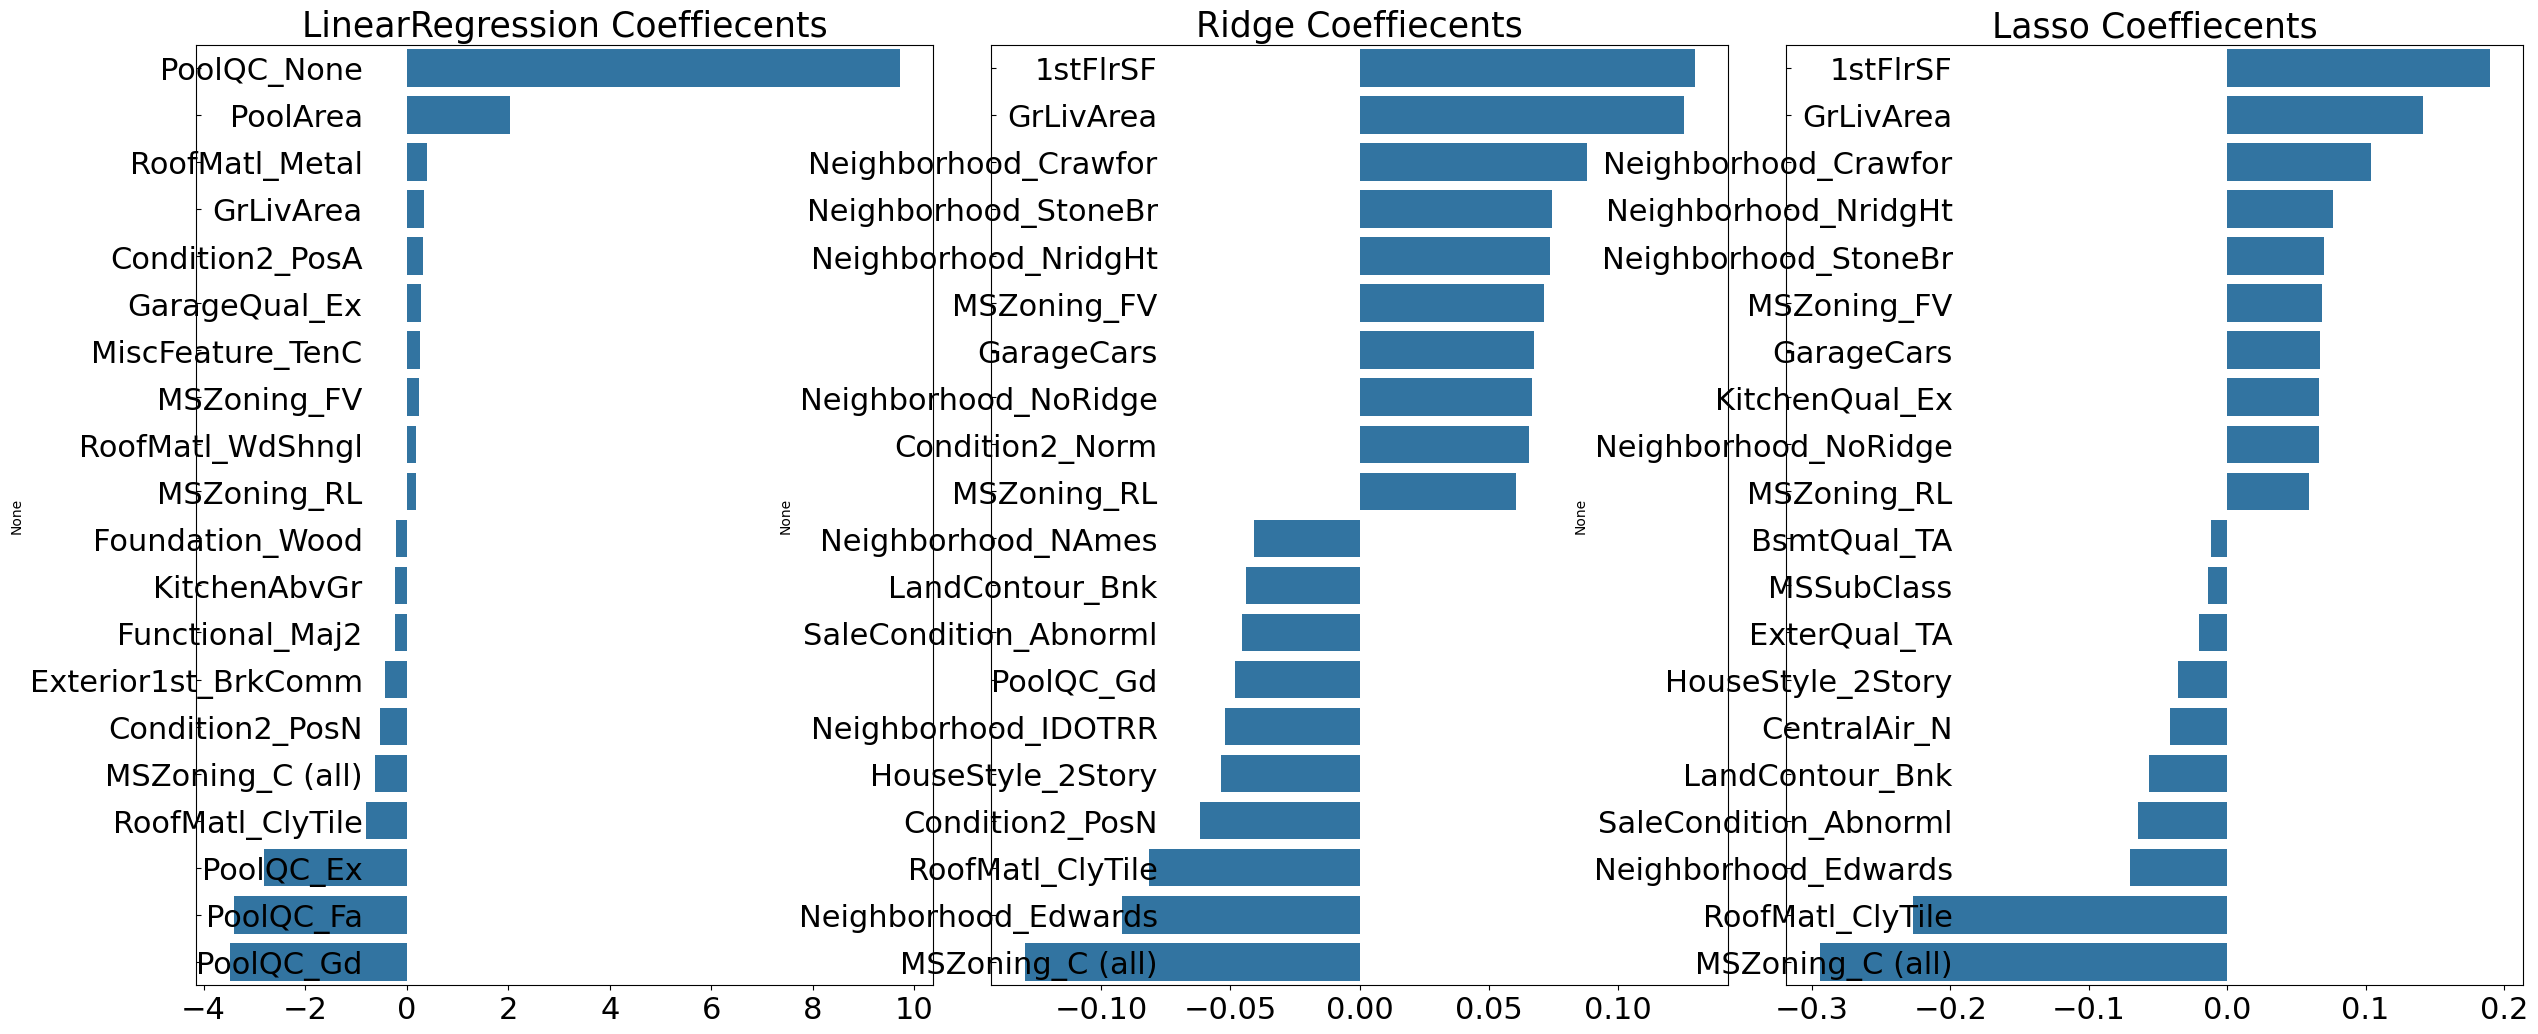

In [ ]:
# 앞의 최적화 alpha값으로 학습데이터로 학습, 테스트 데이터로 예측 및 평가 수행.
lr_reg = LinearRegression()
lr_reg.fit(X_train, y_train)
ridge_reg = Ridge(alpha=10)
ridge_reg.fit(X_train, y_train)
lasso_reg = Lasso(alpha=0.001)
lasso_reg.fit(X_train, y_train)

# 모든 모델의 RMSE 출력
models = [lr_reg, ridge_reg, lasso_reg]
get_rmses(models)

# 모든 모델의 회귀 계수 시각화
models = [lr_reg, ridge_reg, lasso_reg]
visualize_coefficient(models)

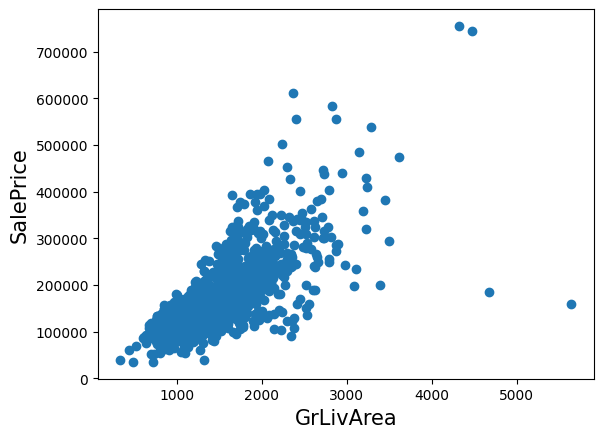

In [ ]:
plt.scatter(x = house_df_org['GrLivArea'], y = house_df_org['SalePrice'])
plt.ylabel('SalePrice', fontsize=15)
plt.xlabel('GrLivArea', fontsize=15)
plt.show()

In [ ]:
# GrLivArea와 SalePrice 모두 로그 변환되었으므로 이를 반영한 조건 생성.
cond1 = house_df_ohe['GrLivArea'] > np.log1p(4000)
cond2 = house_df_ohe['SalePrice'] < np.log1p(500000)
outlier_index = house_df_ohe[cond1 & cond2].index

print('아웃라이어 레코드 index :', outlier_index.values)
print('아웃라이어 삭제 전 house_df_ohe shape:', house_df_ohe.shape)
# DataFrame의 index를 이용하여 아웃라이어 레코드 삭제.
house_df_ohe.drop(outlier_index , axis=0, inplace=True)
print('아웃라이어 삭제 후 house_df_ohe shape:', house_df_ohe.shape)

아웃라이어 레코드 index : [ 64 373]
아웃라이어 삭제 전 house_df_ohe shape: (1168, 301)
아웃라이어 삭제 후 house_df_ohe shape: (1166, 301)


In [ ]:
y_target = house_df_ohe['SalePrice']
X_features = house_df_ohe.drop('SalePrice',axis=1, inplace=False)
X_train, X_test, y_train, y_test = train_test_split(X_features, y_target, test_size=0.2, random_state=156)

ridge_params = { 'alpha':[0.05, 0.1, 1, 5, 8, 10, 12, 15, 20] }
lasso_params = { 'alpha':[0.001, 0.005, 0.008, 0.05, 0.03, 0.1, 0.5, 1,5, 10] }
best_ridge = print_best_params(ridge_reg, ridge_params)
best_lasso = print_best_params(lasso_reg, lasso_params)

Ridge 5 CV 시 최적 평균 RMSE 값: 0.1156, 최적 alpha:{'alpha': 5}
Lasso 5 CV 시 최적 평균 RMSE 값: 0.1134, 최적 alpha:{'alpha': 0.001}


LinearRegression 로그 변환된 RMSE: 22460.396
LinearRegression 로그 변환된 MSE: 504469409.754
LinearRegression 로그 변환해 RMSE: 22460.396
LinearRegression 로그 변환된 MSE: 504469409.754
Ridge 로그 변환된 RMSE: 21112.912
Ridge 로그 변환된 MSE: 445755039.079
Ridge 로그 변환해 RMSE: 21112.912
Ridge 로그 변환된 MSE: 445755039.079
Lasso 로그 변환된 RMSE: 20353.499
Lasso 로그 변환된 MSE: 414264937.668
Lasso 로그 변환해 RMSE: 20353.499
Lasso 로그 변환된 MSE: 414264937.668


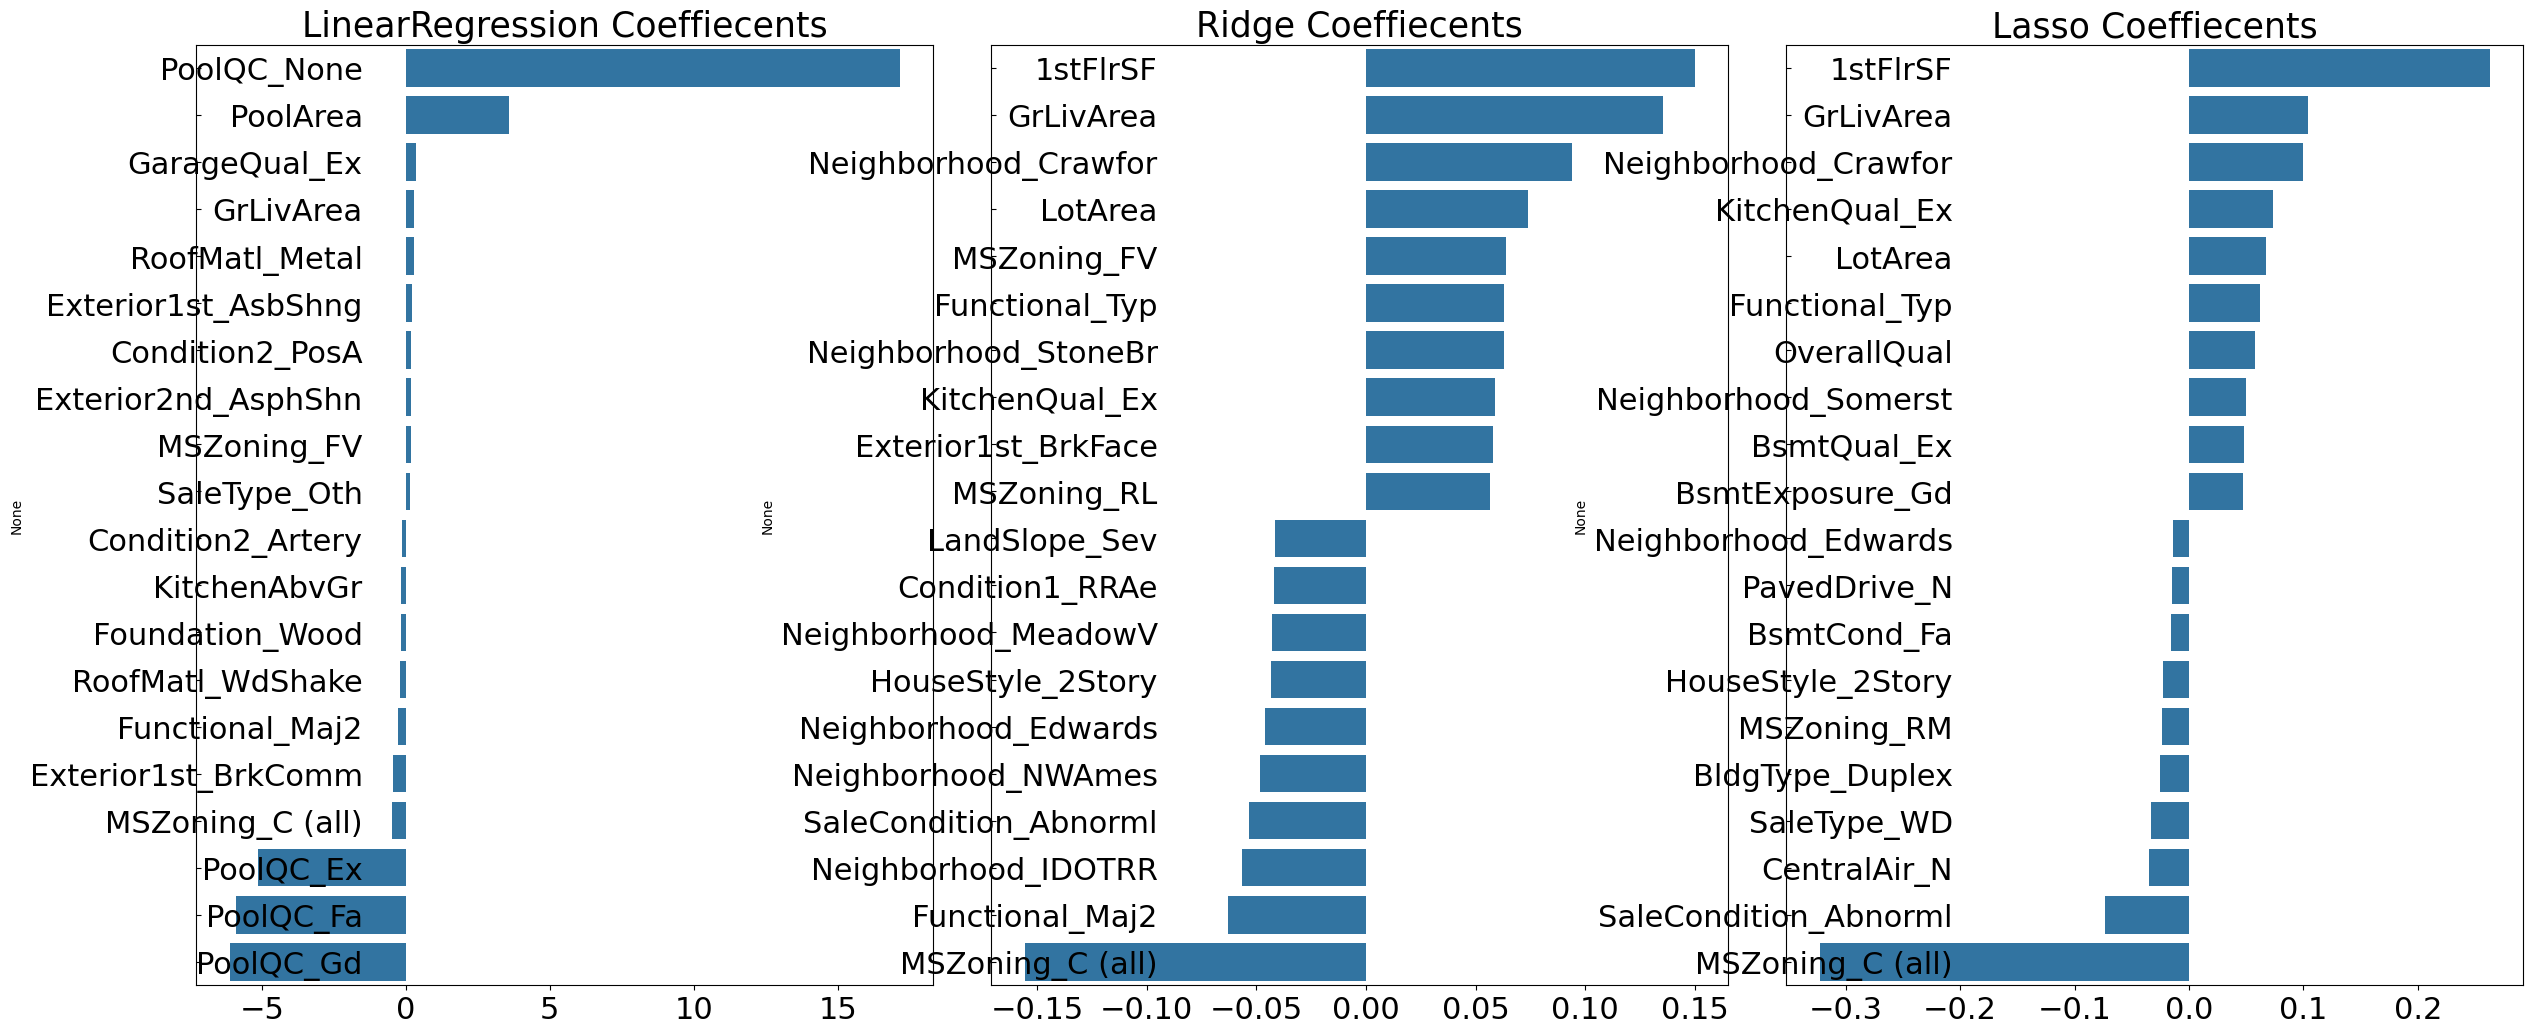

In [ ]:
# 앞의 최적화 alpha값으로 학습데이터로 학습, 테스트 데이터로 예측 및 평가 수행.
lr_reg = LinearRegression()
lr_reg.fit(X_train, y_train)
ridge_reg = Ridge(alpha=8)
ridge_reg.fit(X_train, y_train)
lasso_reg = Lasso(alpha=0.001)
lasso_reg.fit(X_train, y_train)

# 모든 모델의 RMSE 출력
models = [lr_reg, ridge_reg, lasso_reg]
get_rmses(models)

# 모든 모델의 회귀 계수 시각화
models = [lr_reg, ridge_reg, lasso_reg]
visualize_coefficient(models)

In [ ]:
from xgboost import XGBRegressor

xgb_params = {'n_estimators':[1000]}
xgb_reg = XGBRegressor(n_estimators=1000, learning_rate=0.05,
                       colsample_bytree=0.5, subsample=0.8)
best_xgb = print_best_params(xgb_reg, xgb_params)

XGBRegressor 5 CV 시 최적 평균 RMSE 값: 0.1249, 최적 alpha:{'n_estimators': 1000}


In [ ]:
from lightgbm import LGBMRegressor

lgbm_params = {'n_estimators':[1000]}
lgbm_reg = LGBMRegressor(n_estimators=1000, learning_rate=0.05, num_leaves=4,
                         subsample=0.6, colsample_bytree=0.4, reg_lambda=10, n_jobs=-1)
best_lgbm = print_best_params(lgbm_reg, lgbm_params)

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005658 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 3231
[LightGBM] [Info] Number of data points in the train set: 932, number of used features: 185
[LightGBM] [Info] Start training from score 12.020420
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001198 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 3214
[LightGBM] [Info] Number of data points in the train set: 933, number of used features: 176
[LightGBM] [Info] Start training from score 12.025656
[LightGBM] [Warning] Found w

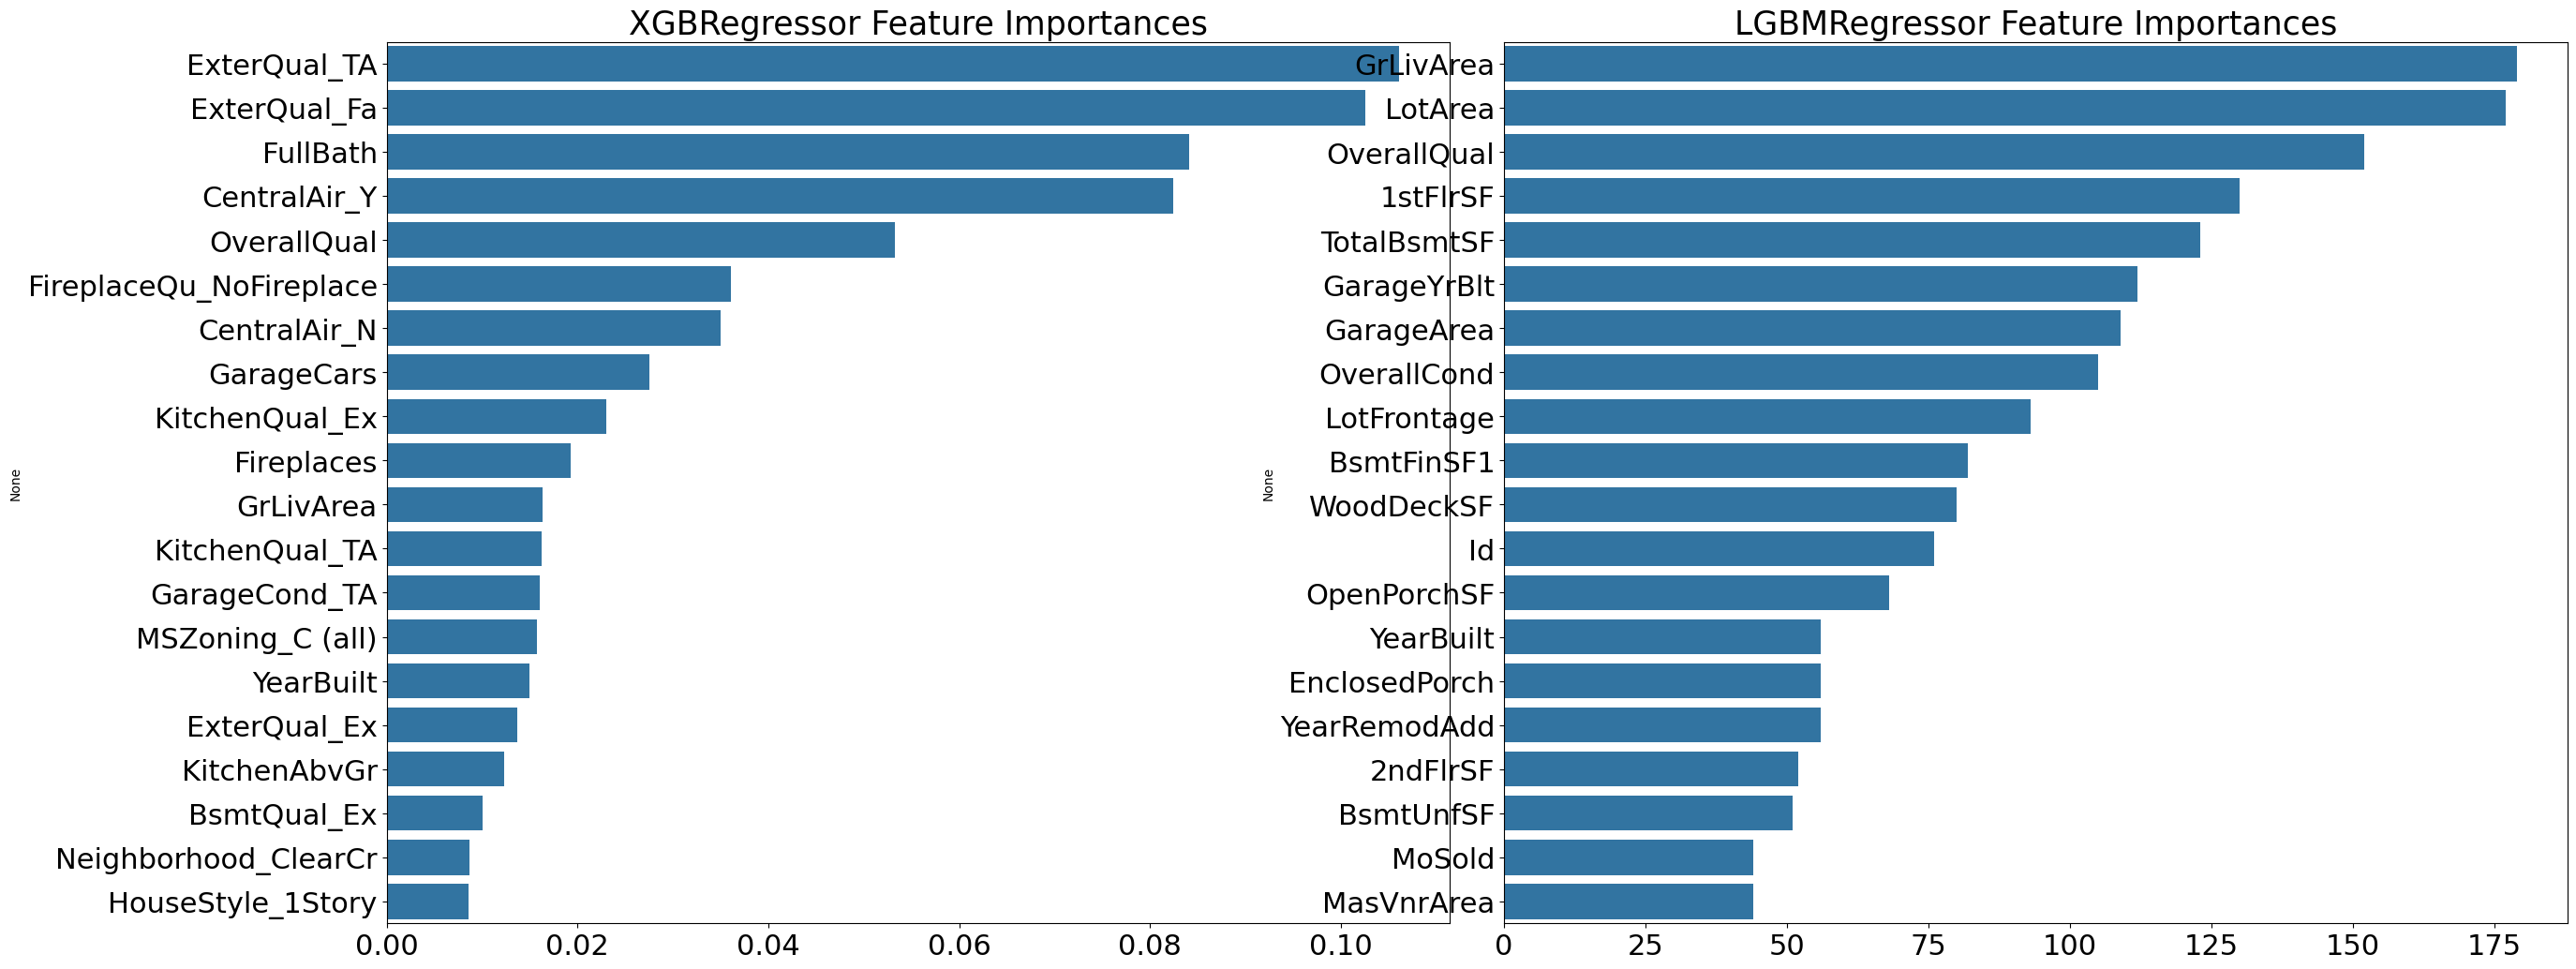

In [ ]:
# 모델의 중요도 상위 20개의 피처명과 그때의 중요도값을 Series로 반환.
def get_top_features(model):
    ftr_importances_values = model.feature_importances_
    ftr_importances = pd.Series(ftr_importances_values, index=X_features.columns  )
    ftr_top20 = ftr_importances.sort_values(ascending=False)[:20]
    return ftr_top20

def visualize_ftr_importances(models):
    # 2개 회귀 모델의 시각화를 위해 2개의 컬럼을 가지는 subplot 생성
    fig, axs = plt.subplots(figsize=(24,10),nrows=1, ncols=2)
    fig.tight_layout()
    # 입력인자로 받은 list객체인 models에서 차례로 model을 추출하여 피처 중요도 시각화.
    for i_num, model in enumerate(models):
        # 중요도 상위 20개의 피처명과 그때의 중요도값 추출
        ftr_top20 = get_top_features(model)
        axs[i_num].set_title(model.__class__.__name__+' Feature Importances', size=25)
        #font 크기 조정.
        for label in (axs[i_num].get_xticklabels() + axs[i_num].get_yticklabels()):
            label.set_fontsize(22)
        sns.barplot(x=ftr_top20.values, y=ftr_top20.index , ax=axs[i_num])

# 앞 예제에서 print_best_params( )가 반환한 GridSearchCV로 최적화된 모델의 피처 중요도 시각화
models = [best_xgb, best_lgbm]
visualize_ftr_importances(models)

In [ ]:
def get_rmse_pred(preds):
    for key in preds.keys():
        pred_value = preds[key]
        mse = mean_squared_error(y_test , pred_value)
        rmse = np.sqrt(mse)
        print('{0} 모델의 RMSE: {1}'.format(key, rmse))

# 개별 모델의 학습
ridge_reg = Ridge(alpha=8)
ridge_reg.fit(X_train, y_train)
lasso_reg = Lasso(alpha=0.001)
lasso_reg.fit(X_train, y_train)
# 개별 모델 예측
ridge_pred = ridge_reg.predict(X_test)
lasso_pred = lasso_reg.predict(X_test)

# 개별 모델 예측값 혼합으로 최종 예측값 도출
pred = 0.4 * ridge_pred + 0.6 * lasso_pred
preds = {'최종 혼합': pred,
         'Ridge': ridge_pred,
         'Lasso': lasso_pred}
#최종 혼합 모델, 개별모델의 RMSE 값 출력
get_rmse_pred(preds)

최종 혼합 모델의 RMSE: 0.1129465487711197
Ridge 모델의 RMSE: 0.11710652273556217
Lasso 모델의 RMSE: 0.11227155526235916


In [ ]:
xgb_reg = XGBRegressor(n_estimators=1000, learning_rate=0.05,
                       colsample_bytree=0.5, subsample=0.8)
lgbm_reg = LGBMRegressor(n_estimators=1000, learning_rate=0.05, num_leaves=4,
                         subsample=0.6, colsample_bytree=0.4, reg_lambda=10, n_jobs=-1)
xgb_reg.fit(X_train, y_train)
lgbm_reg.fit(X_train, y_train)
xgb_pred = xgb_reg.predict(X_test)
lgbm_pred = lgbm_reg.predict(X_test)

pred = 0.5 * xgb_pred + 0.5 * lgbm_pred
preds = {'최종 혼합': pred,
         'XGBM': xgb_pred,
         'LGBM': lgbm_pred}

get_rmse_pred(preds)

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001619 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 3218
[LightGBM] [Info] Number of data points in the train set: 932, number of used features: 174
[LightGBM] [Info] Start training from score 12.029584
최종 혼합 모델의 RMSE: 0.11452430275126027
XGBM 모델의 RMSE: 0.11533989336341832
LGBM 모델의 RMSE: 0.12151384290751206


In [ ]:
from sklearn.model_selection import KFold
from sklearn.metrics import mean_absolute_error

# 개별 기반 모델에서 최종 메타 모델이 사용할 학습 및 테스트용 데이터를 생성하기 위한 함수.
def get_stacking_base_datasets(model, X_train_n, y_train_n, X_test_n, n_folds ):
    # 지정된 n_folds값으로 KFold 생성.
    kf = KFold(n_splits=n_folds, shuffle=False)
    #추후에 메타 모델이 사용할 학습 데이터 반환을 위한 넘파이 배열 초기화
    train_fold_pred = np.zeros((X_train_n.shape[0] ,1 ))
    test_pred = np.zeros((X_test_n.shape[0],n_folds))
    print(model.__class__.__name__ , ' model 시작 ')

    for folder_counter , (train_index, valid_index) in enumerate(kf.split(X_train_n)):
        #입력된 학습 데이터에서 기반 모델이 학습/예측할 폴드 데이터 셋 추출
        print('\t 폴드 세트: ',folder_counter,' 시작 ')
        X_tr = X_train_n[train_index]
        y_tr = y_train_n[train_index]
        X_te = X_train_n[valid_index]

        #폴드 세트 내부에서 다시 만들어진 학습 데이터로 기반 모델의 학습 수행.
        model.fit(X_tr , y_tr)
        #폴드 세트 내부에서 다시 만들어진 검증 데이터로 기반 모델 예측 후 데이터 저장.
        train_fold_pred[valid_index, :] = model.predict(X_te).reshape(-1,1)
        #입력된 원본 테스트 데이터를 폴드 세트내 학습된 기반 모델에서 예측 후 데이터 저장.
        test_pred[:, folder_counter] = model.predict(X_test_n)

    # 폴드 세트 내에서 원본 테스트 데이터를 예측한 데이터를 평균하여 테스트 데이터로 생성
    test_pred_mean = np.mean(test_pred, axis=1).reshape(-1,1)

    #train_fold_pred는 최종 메타 모델이 사용하는 학습 데이터, test_pred_mean은 테스트 데이터
    return train_fold_pred , test_pred_mean

In [ ]:
# get_stacking_base_datasets( )은 넘파이 ndarray를 인자로 사용하므로 DataFrame을 넘파이로 변환.
X_train_n = X_train.values
X_test_n = X_test.values
y_train_n = y_train.values

# 각 개별 기반(Base)모델이 생성한 학습용/테스트용 데이터 반환.
ridge_train, ridge_test = get_stacking_base_datasets(ridge_reg, X_train_n, y_train_n, X_test_n, 5)
lasso_train, lasso_test = get_stacking_base_datasets(lasso_reg, X_train_n, y_train_n, X_test_n, 5)
xgb_train, xgb_test = get_stacking_base_datasets(xgb_reg, X_train_n, y_train_n, X_test_n, 5)
lgbm_train, lgbm_test = get_stacking_base_datasets(lgbm_reg, X_train_n, y_train_n, X_test_n, 5)

Ridge  model 시작 
	 폴드 세트:  0  시작 
	 폴드 세트:  1  시작 
	 폴드 세트:  2  시작 
	 폴드 세트:  3  시작 
	 폴드 세트:  4  시작 
Lasso  model 시작 
	 폴드 세트:  0  시작 
	 폴드 세트:  1  시작 
	 폴드 세트:  2  시작 
	 폴드 세트:  3  시작 
	 폴드 세트:  4  시작 
XGBRegressor  model 시작 
	 폴드 세트:  0  시작 
	 폴드 세트:  1  시작 
	 폴드 세트:  2  시작 
	 폴드 세트:  3  시작 
	 폴드 세트:  4  시작 
LGBMRegressor  model 시작 
	 폴드 세트:  0  시작 
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001351 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2956
[LightGBM] [Info] Number of data points in the train set: 745, number of used features: 164
[LightGBM] [Info] Start training from score 12.030249
	 폴드 세트:  1  시작 
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001214 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2973
[LightGBM] [Info] Number of data points in the train set: 745, number of used features: 16

In [ ]:
# 개별 모델이 반환한 학습 및 테스트용 데이터 세트를 Stacking 형태로 결합.
Stack_final_X_train = np.concatenate((ridge_train, lasso_train,
                                      xgb_train, lgbm_train), axis=1)
Stack_final_X_test = np.concatenate((ridge_test, lasso_test,
                                     xgb_test, lgbm_test), axis=1)

# 최종 메타 모델은 라쏘 모델을 적용.
meta_model_lasso = Lasso(alpha=0.0005)

#기반 모델의 예측값을 기반으로 새롭게 만들어진 학습 및 테스트용 데이터로 예측하고 RMSE 측정.
meta_model_lasso.fit(Stack_final_X_train, y_train)
final = meta_model_lasso.predict(Stack_final_X_test)
mse = mean_squared_error(y_test , final)
rmse = np.sqrt(mse)
print('스태킹 회귀 모델의 최종 RMSE 값은:', rmse)

스태킹 회귀 모델의 최종 RMSE 값은: 0.11112721452881884


# 제출용 Test 데이터 전처리 진행

### train에 진행된 전처리
- NUll 많은 컬럼 삭제
- skew 컬럼 로그 변환
- 원핫 인코딩

결과값의 컬럼 개수가 266개여야한다

또 test와 train의 원핫인코딩 이후 개수가 달라지는 현상이 발생하게되는데

이때는 값이 너무 많아서
```
test_ohe1 = pd.get_dummies(test)
test_ohe2 = test_ohe1.reindex(columns=X_train.columns, fill_value=0)
```
이런 방식으로 train과 열 개수를 맞춰주는 방식을 사용해봄
- 다른 방식을 사용해보셔도 좋습니다~

In [ ]:
X_train.shape

(932, 300)

In [ ]:


impute_missing_values(test_df)
# Verify that there are no more missing values

print("\n--- Missing Value Handling Complete ---\n")

print('get_dummies() 수행 전 데이터 Shape:', test_df.shape)
test_ohe1 = pd.get_dummies(test_df)
print('get_dummies() 수행 후 test 데이터 OHE Shape:', test_ohe1.shape)

test_ohe2 = test_ohe1.reindex(columns=X_train.columns, fill_value=0)
print(f"after reindexing, Test data set shape : {test_ohe2.shape}")
# test 데이터에 대해 skew가 큰 피처들에 대해 로그 변환을 수행
test_ohe2[skew_features_top.index] = np.log1p(test_ohe2[skew_features_top.index])
test_ohe2 = pd.get_dummies(test_ohe2)

print(f"Final Test data set shape : {test_ohe2.shape}")


--- Missing Value Handling Complete ---

get_dummies() 수행 전 데이터 Shape: (292, 80)
get_dummies() 수행 후 test 데이터 OHE Shape: (292, 262)
after reindexing, Test data set shape : (292, 300)
Final Test data set shape : (292, 300)


# 저는 위에서 진행한 lgbm으로 넣어봤습니다

In [ ]:
## sample_data를 받아오기
sample = pd.read_csv('./sample_submission.csv')

# SalePrice 가 0으로 차있는 sample
sample

,Id,SalePrice
0,86,0
1,227,0
2,492,0
3,64,0
4,576,0
...,...,...
287,1271,0
288,903,0
289,1019,0
290,312,0


In [ ]:
pred = ridge_reg.predict(test_ohe2)
# 학습시 로그변환한 target을 썻으니 결과값을 다시 복원해야합니다
pred_exp = np.expm1(pred)

# sample 파일에 예측 값을 넣어주고
sample["SalePrice"] = pred_exp

# csv로 저장하기
sample.to_csv("./submission.csv", index=False)

In [ ]:
# 제출부분과 크기가 맞는지 확인
pred_exp.shape

(292,)

In [ ]:
pred_exp

array([265898.5342298 , 269682.66540227, 141819.45838713, 130370.71652006,
       118365.92926764, 315432.1140815 , 246362.04876987,  93293.83945504,
       174315.4629254 , 138431.51784389, 265571.62261392, 237208.78557756,
        73995.20983836,  82150.07145719, 128291.23879139, 137859.50769244,
       125672.29937249, 271402.40594116, 210652.09907049, 117714.32027628,
       263506.93514777, 152425.39056175, 131693.97593202, 206298.67951797,
       119463.34736846, 194187.62438555, 136553.00298527, 144714.42674644,
       370064.43508041, 194401.71235623, 194569.0050373 , 186349.20406261,
       163308.89130616, 146999.26435093, 173241.66349488, 353994.49476122,
       100948.74776227, 209698.40980072, 230953.97060416, 135190.8475306 ,
       314201.64100501, 211379.29341681, 116534.55353529, 303671.85684752,
       119876.38179647, 168664.93501321, 123312.16907461, 134250.19025727,
       207009.15458196, 163434.58546344, 206975.58586233, 144834.04436566,
       211859.42265284, 1